In [33]:
# Data Processing
import pandas as pd
import numpy as np

# Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [34]:
# Read data and split
data = pd.read_csv("dataset2To25.csv")
X = data.iloc[:, 1:13]
y = data.iloc[:, 13]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [35]:
print(X)
print(X.info())
print(y)

       B1_red  B1_green   B1_blue    B2_red  B2_green   B2_blue    B3_red  \
0    0.444666  0.539361  0.015973  0.129066  0.674274  0.196660  0.000000   
1    0.181546  0.802624  0.015830  0.067276  0.860199  0.072525  0.000000   
2    0.752139  0.237022  0.010839  0.106402  0.716740  0.176859  0.000000   
3    0.803480  0.069880  0.126640  0.051531  0.777416  0.171054  0.000000   
4    0.736024  0.128066  0.135910  0.118091  0.631571  0.250338  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
547  0.449373  0.537792  0.012835  0.142744  0.737734  0.119523  0.002001   
548  0.222618  0.764689  0.012693  0.031968  0.858529  0.109503  0.000000   
549  0.239875  0.741871  0.018254  0.038807  0.893042  0.068151  0.000000   
550  0.355248  0.621078  0.023674  0.043499  0.805408  0.151093  0.000000   
551  0.617228  0.374929  0.007844  0.063221  0.789742  0.147038  0.000000   

     B3_green   B3_blue    B4_red  B4_green   B4_blue  
0    0.165299  0.83

In [36]:
#Fitting and Evaluating Model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

Accuracy

In [37]:
# Accuracy
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5180722891566265


Visualizing Results

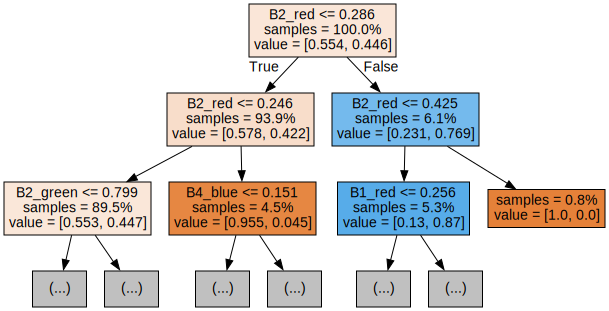

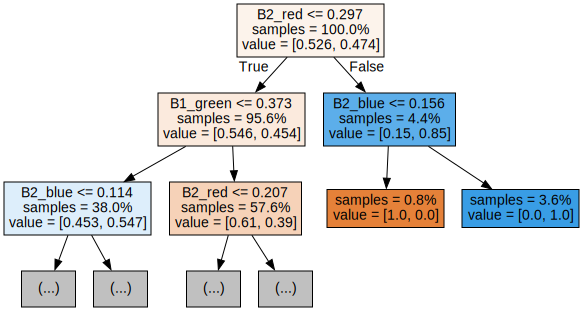

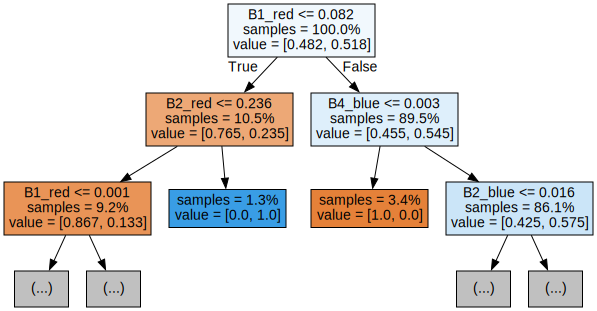

In [28]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

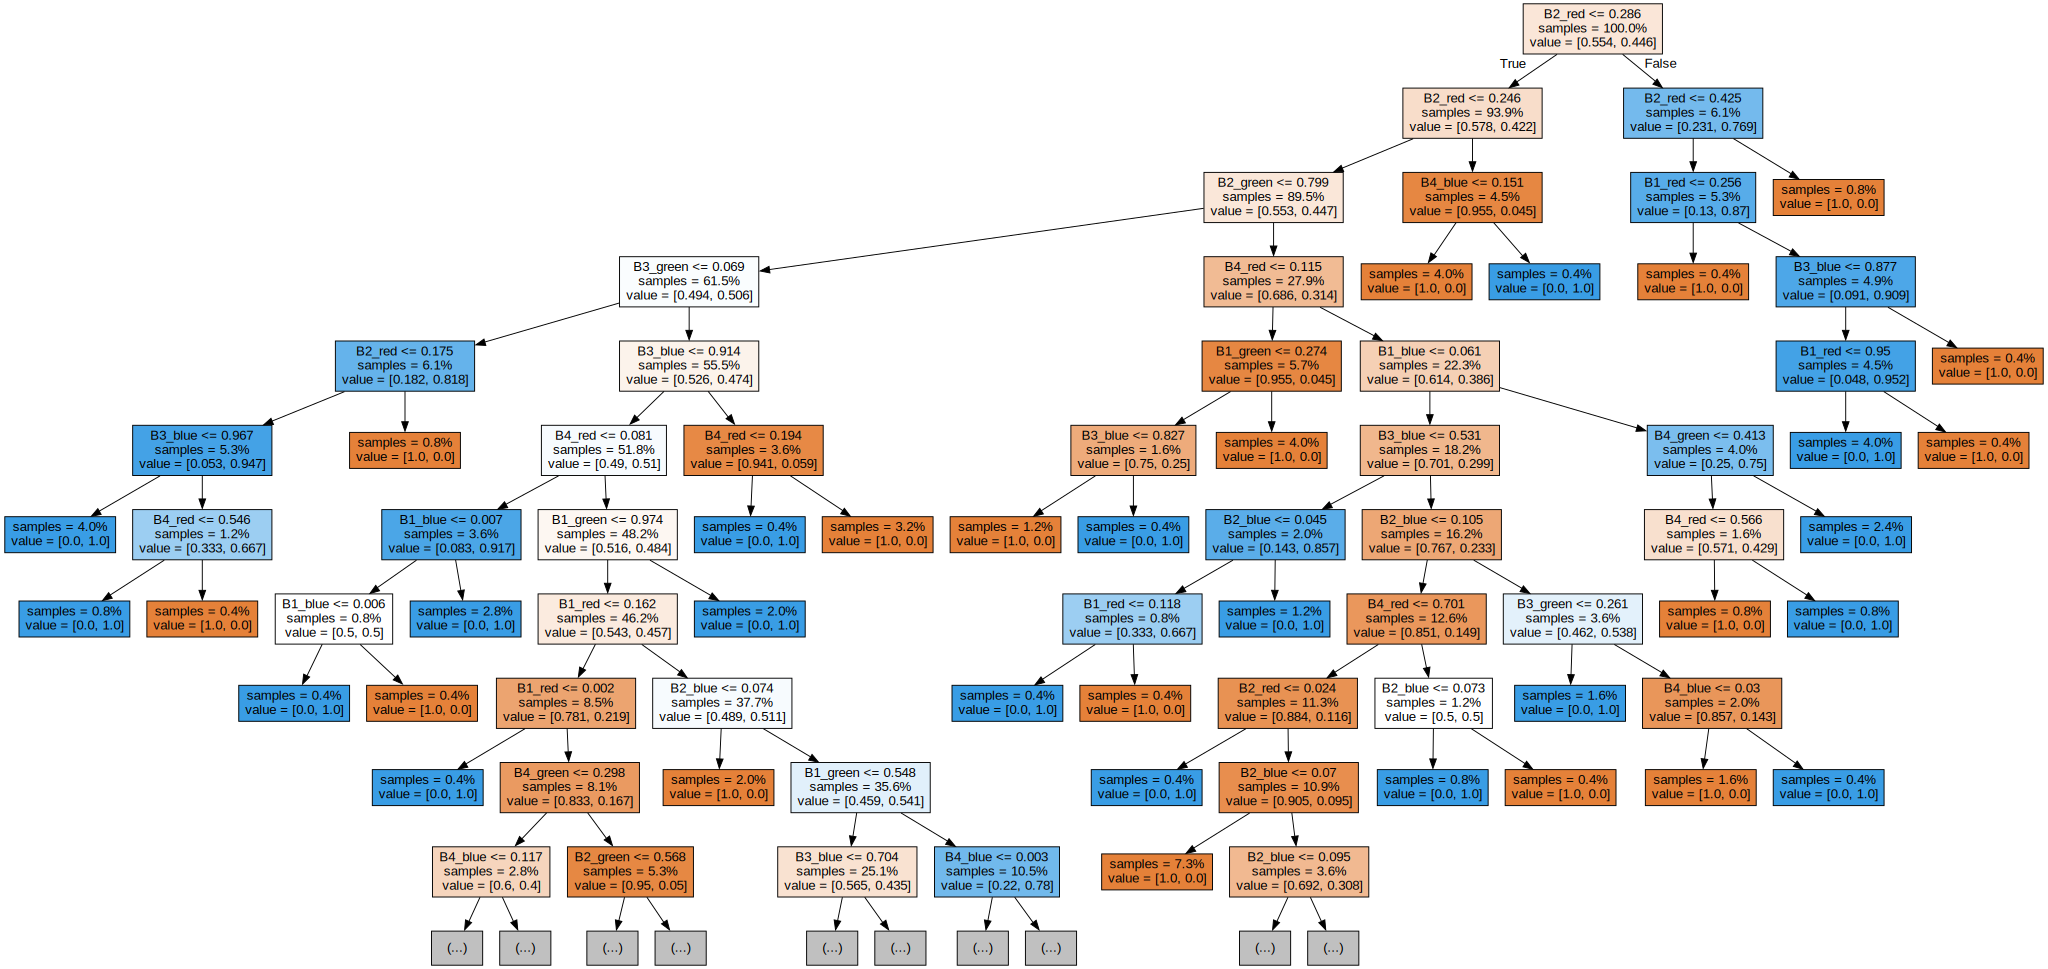

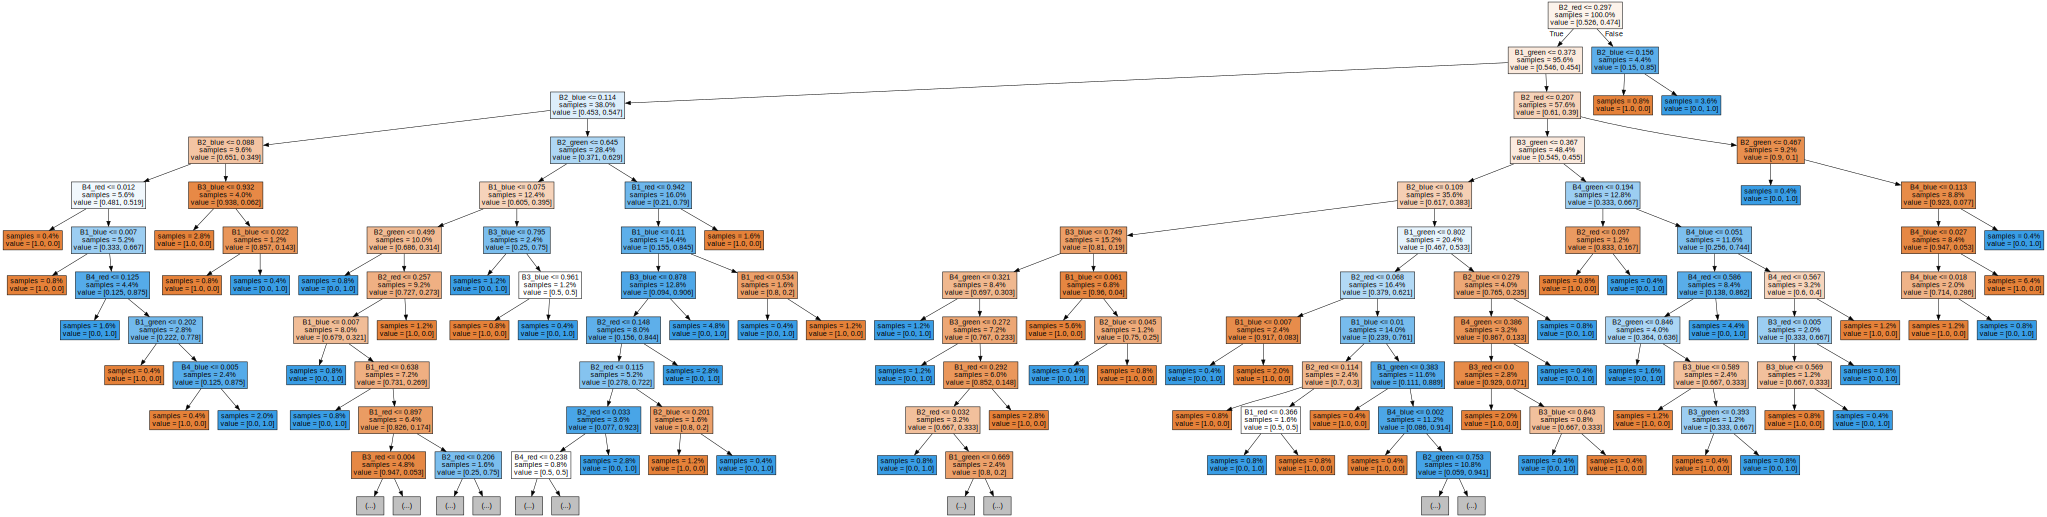

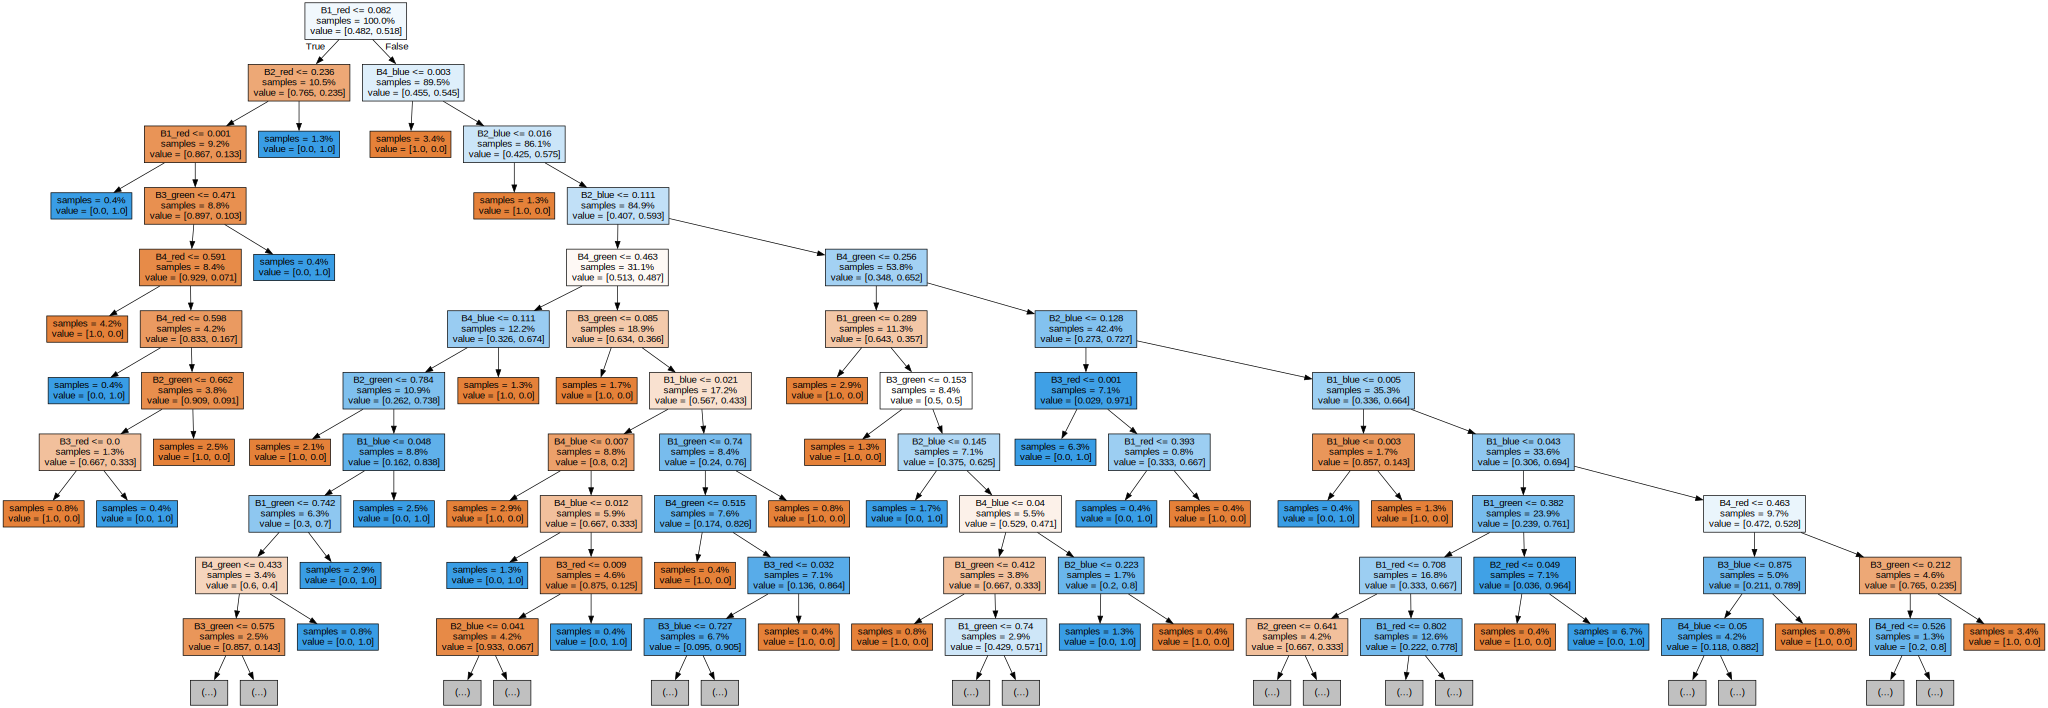

In [29]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=10, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

Hyperparameter Tuning

In [30]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 5, 'n_estimators': 215}


MISC

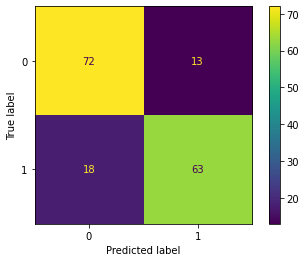

In [38]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [39]:
# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.536144578313253
Precision: 0.5222222222222223
Recall: 0.5802469135802469


<AxesSubplot:>

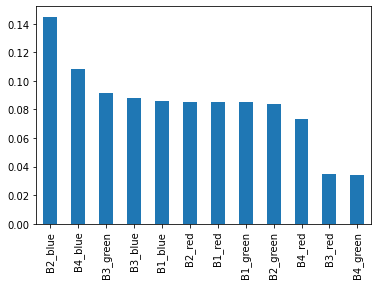

In [12]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar()

In [13]:
from sklearn.neighbors  import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=3)

In [15]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=knn,X=X_train,y=y_train,cv=10)
accuracies

array([0.51111111, 0.54545455, 0.61363636, 0.45454545, 0.52272727,
       0.59090909, 0.40909091, 0.43181818, 0.56818182, 0.52272727])

In [16]:
print("average accuracy :",np.mean(accuracies))
print("average std :",np.std(accuracies))

average accuracy : 0.517020202020202
average std : 0.06413387770884006


In [17]:
knn.fit(X_train,y_train)
print("test accuracy :",knn.score(X_test,y_test))

test accuracy : 0.4954954954954955


In [18]:
#Implementing cross validation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
k = 6
kf = KFold(n_splits=k, random_state=42, shuffle=True)
model = LogisticRegression(solver= 'liblinear')
 
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.5, 0.4673913043478261, 0.5434782608695652, 0.5652173913043478, 0.5108695652173914, 0.5652173913043478]
Avg accuracy : 0.5253623188405797
